---
format: 
  html:
    toc: true
execute:
  echo: true
---

# Showing static visualizations

This page is generated from a Jupyter notebook and demonstrates how to generate static visualizations with `matplotlib`, `pandas`, and `seaborn`.

Start by importing the packages we need:

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Load the "Palmer penguins" dataset from week 2:

In [19]:
# Load data on Palmer penguins
penguins = pd.read_csv("https://raw.githubusercontent.com/MUSA-550-Fall-2023/week-2/main/data/penguins.csv")

In [20]:
# Show the first ten rows
penguins.head(n=10)    

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


## A simple visualization, 3 different ways

> I want to scatter flipper length vs. bill length, colored by the penguin species

### Using matplotlib 

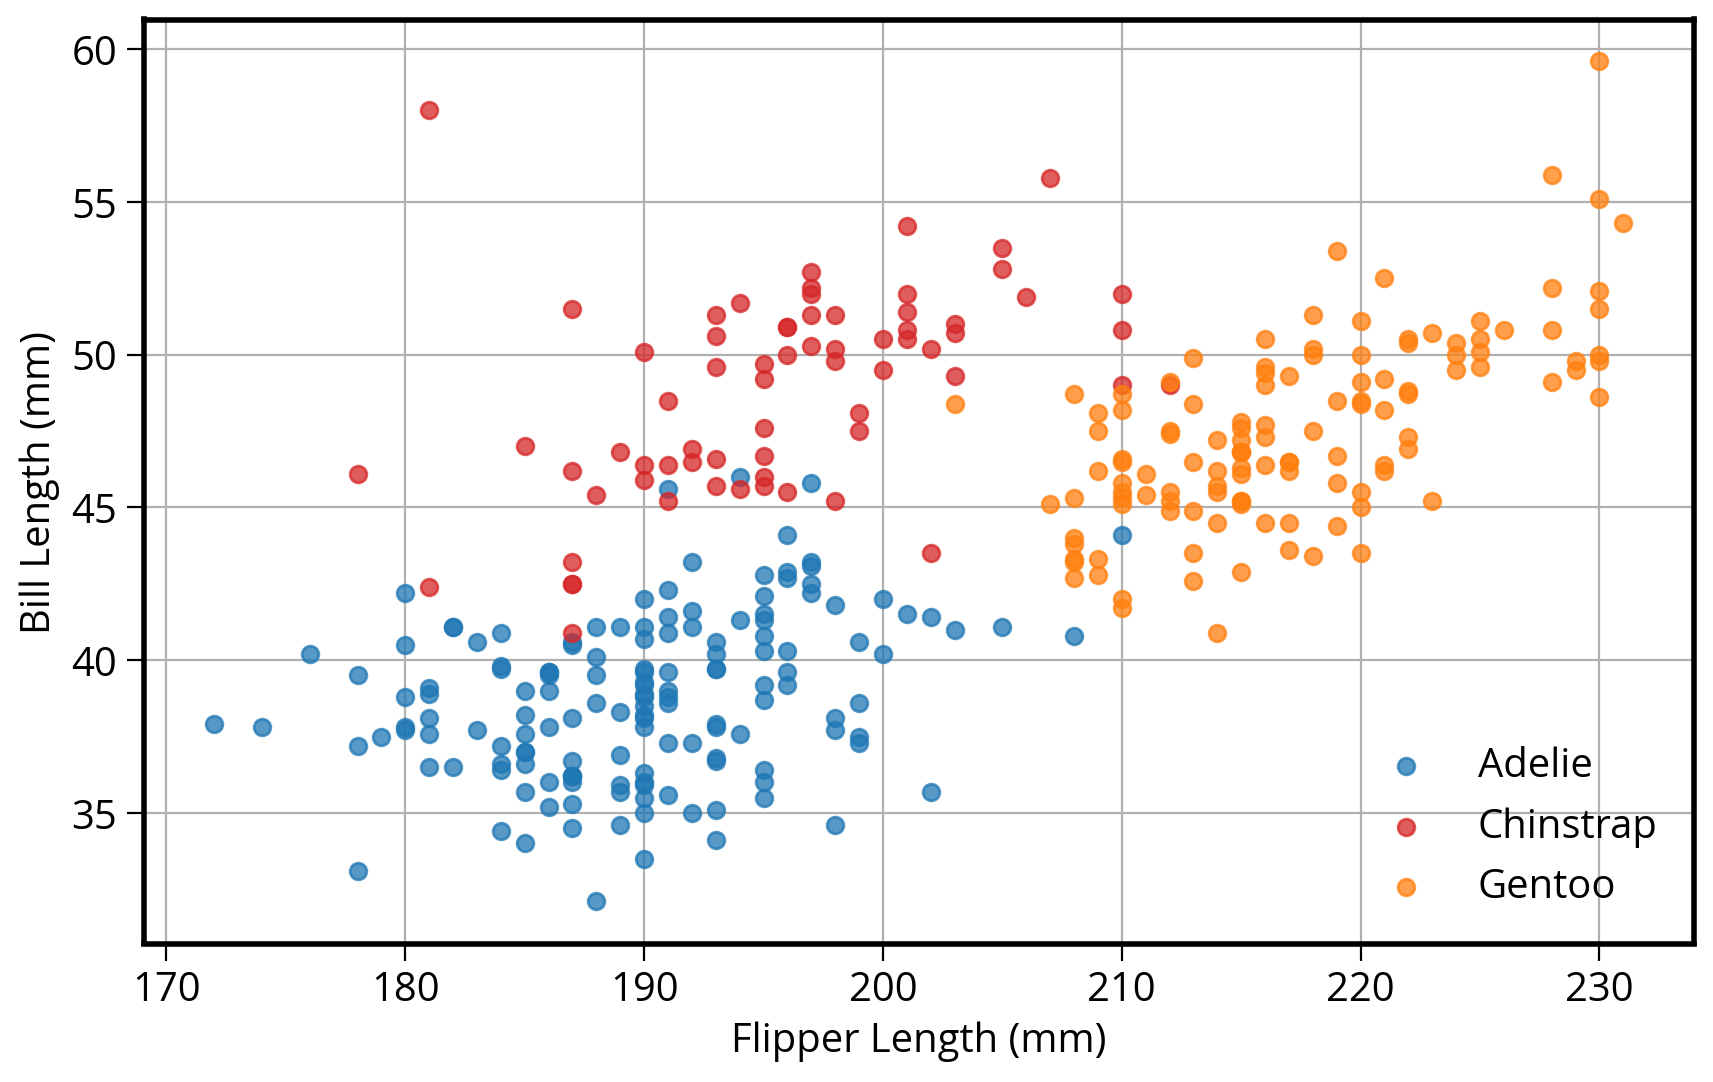

In [18]:
# Setup a dict to hold colors for each species
color_map = {"Adelie": "#1f77b4", "Gentoo": "#ff7f0e", "Chinstrap": "#D62728"}

# Initialize the figure "fig" and axes "ax"
fig, ax = plt.subplots(figsize=(10, 6))

# Group the data frame by species and loop over each group
# NOTE: "group" will be the dataframe holding the data for "species"
for species, group_df in penguins.groupby("species"):

    # Plot flipper length vs bill length for this group
    # Note: we are adding this plot to the existing "ax" object
    ax.scatter(
        group_df["flipper_length_mm"],
        group_df["bill_length_mm"],
        marker="o",
        label=species,
        color=color_map[species],
        alpha=0.75,
        zorder=10
    )

# Plotting is done...format the axes!

## Add a legend to the axes
ax.legend(loc="best")

## Add x-axis and y-axis labels
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Bill Length (mm)")

## Add the grid of lines
ax.grid(True);

### How about in `pandas`?

DataFrames have a built-in "plot" function that can make all of the basic type of matplotlib plots!

First, we need to add a new "color" column specifying the color to use for each species type.

Use the [`pd.replace()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html): it use a dict to replace values in a DataFrame column.

In [11]:
# Calculate a list of colors
color_map = {"Adelie": "#1f77b4", "Gentoo": "#ff7f0e", "Chinstrap": "#D62728"}

# Map species name to color 
penguins["color"] = penguins["species"].replace(color_map)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,color
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,#1f77b4
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,#1f77b4
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,#1f77b4
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,#1f77b4
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,#1f77b4


Now plot!

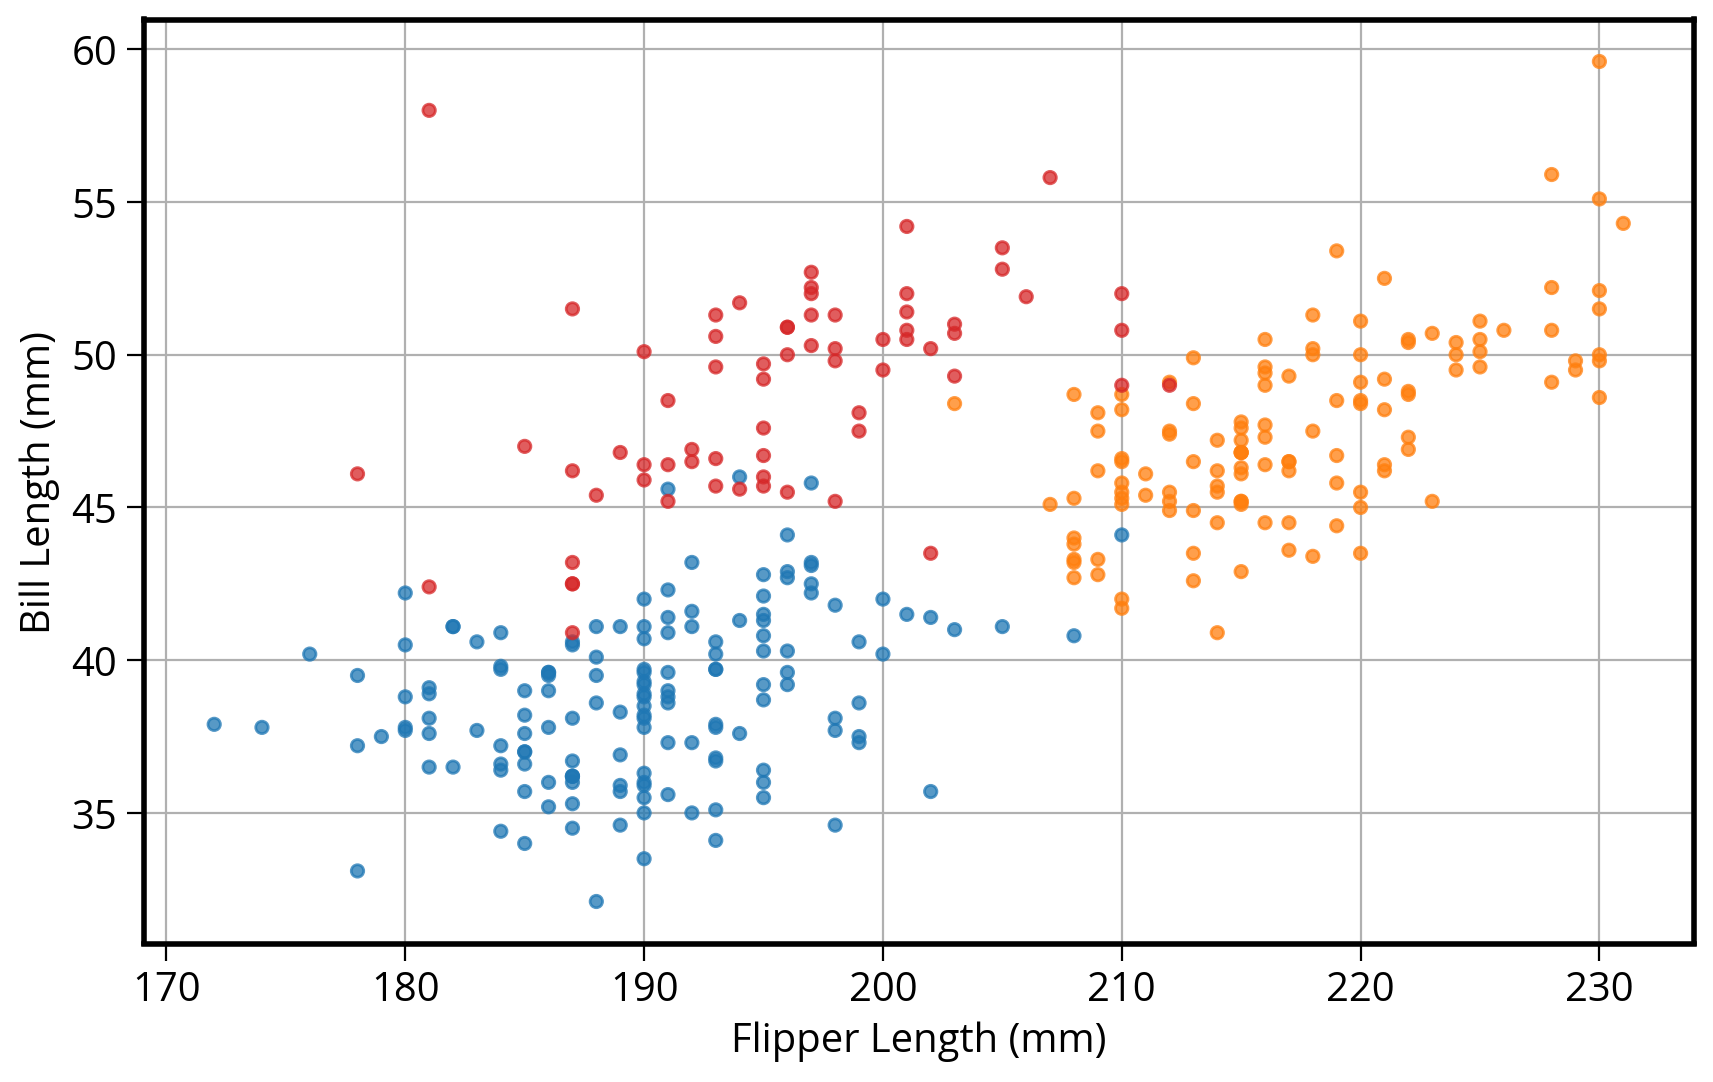

In [17]:
# Same as before: Start by initializing the figure and axes
fig, myAxes = plt.subplots(figsize=(10, 6))

# Scatter plot two columns, colored by third
# Use the built-in pandas plot.scatter function
penguins.plot.scatter(
    x="flipper_length_mm",
    y="bill_length_mm",
    c="color",
    alpha=0.75,
    ax=myAxes, # IMPORTANT: Make sure to plot on the axes object we created already!
    zorder=10
)

# Format the axes finally
myAxes.set_xlabel("Flipper Length (mm)")
myAxes.set_ylabel("Bill Length (mm)")
myAxes.grid(True);

**Note:** no easy way to get legend added to the plot in this case...

### Seaborn: statistical data visualization

**Seaborn** is designed to plot two columns colored by a third column...


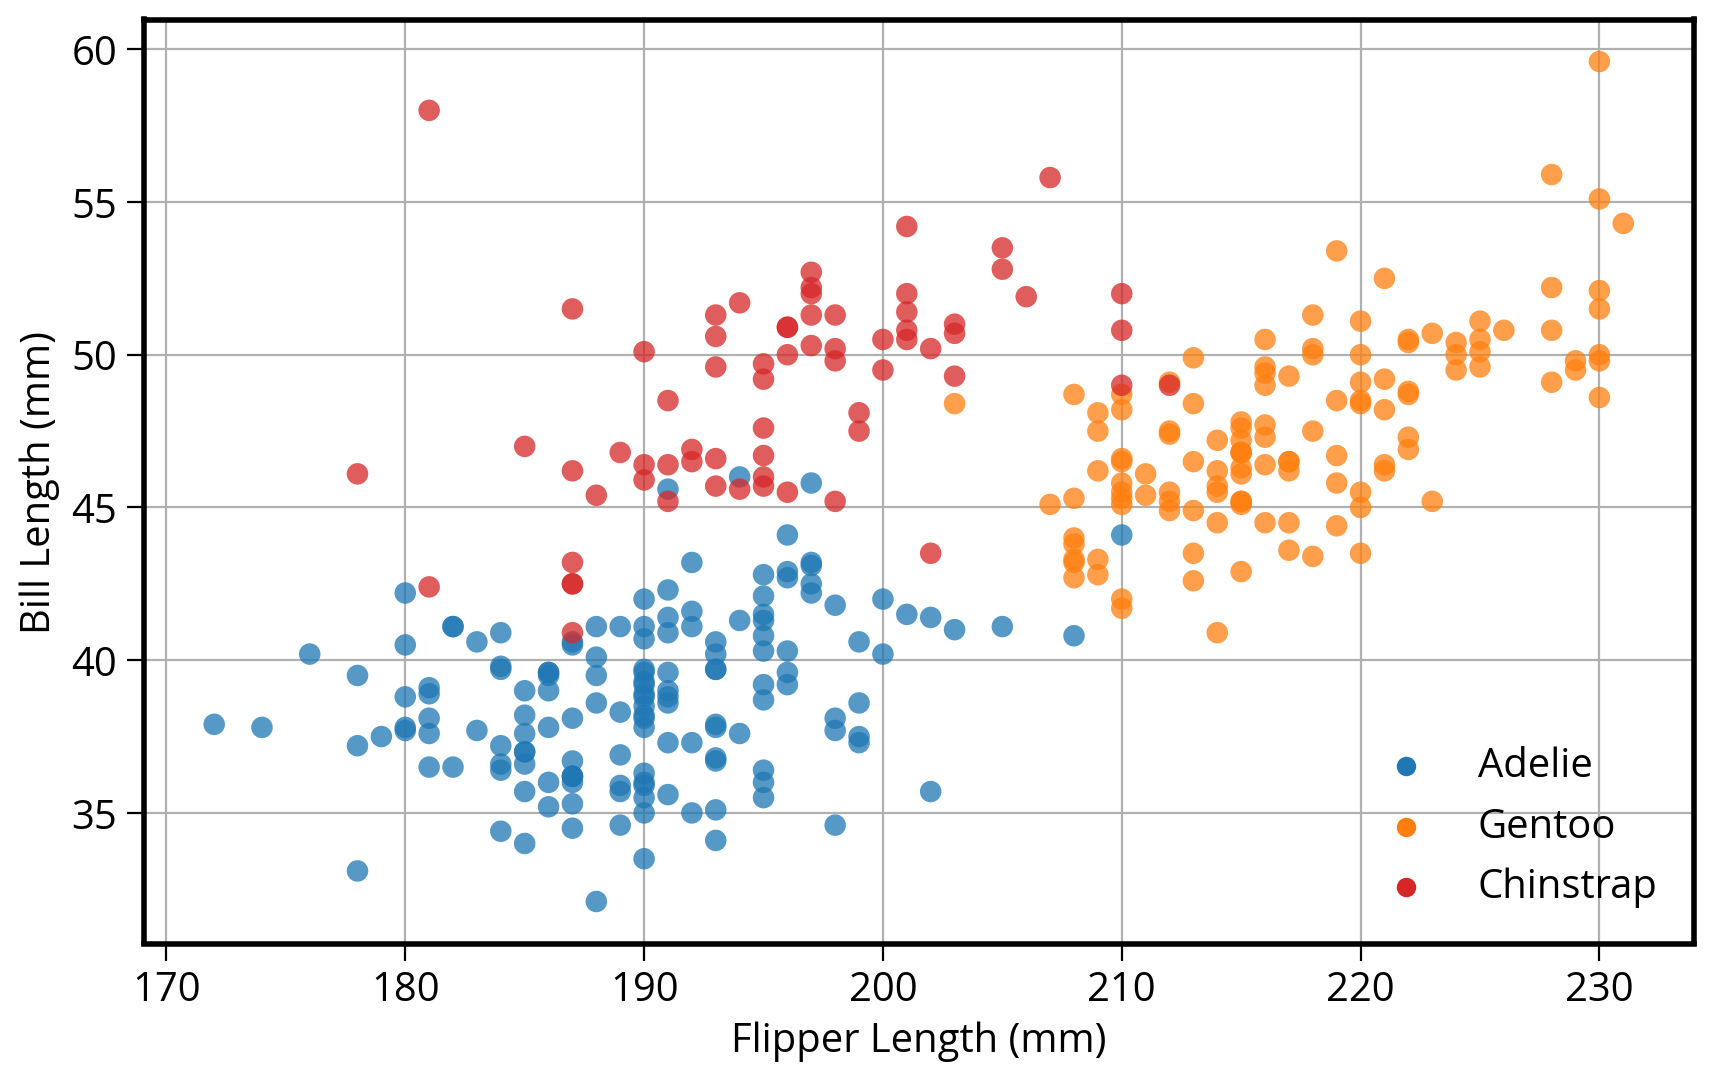

In [16]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# style keywords as dict
color_map = {"Adelie": "#1f77b4", "Gentoo": "#ff7f0e", "Chinstrap": "#D62728"}
style = dict(palette=color_map, s=60, edgecolor="none", alpha=0.75, zorder=10)

# use the scatterplot() function
sns.scatterplot(
    x="flipper_length_mm",  # the x column
    y="bill_length_mm",  # the y column
    hue="species",  # the third dimension (color)
    data=penguins,  # pass in the data
    ax=ax,  # plot on the axes object we made
    **style  # add our style keywords
)

# Format with matplotlib commands
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Bill Length (mm)")
ax.grid(True)
ax.legend(loc="best");